# KELM with PCA

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from TfELM.Resources.Kernel import Kernel, CombinedProductKernel, CombinedSumKernel
from TfELM.Layers.KELMLayer import KELMLayer
from TfELM.Models.KELMModel import KELMModel

from alzheption.utils import custom_cross_val_score
from alzheption.clahe import Clahe
from alzheption.extractor import AlzheptionExtractor
from alzheption.classificator import AlzheptionClassificator

2025-03-14 07:37:52.232446: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 07:37:52.395264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741912672.481410   87363 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741912672.507060   87363 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 07:37:52.679993: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def custom_grayscale_threshold(img):
    img[img < 0.5] = 0                                   # Apply thresholding
    return img

In [3]:
name = "AdvancedAugmentation"

In [4]:
alex_1 = AlzheptionExtractor.load_extractor(
    filepath=f"result/AlzheptionExtractor_{name}.pkl", 
    path_dataset_new="../../asset/dataset_jpg_brightness_balance_augmentation/",
)

alex_1.train_features.__len__(), alex_1.test_features.__len__()

(6840, 1710)

In [5]:
alex_1.dataset

Dataset ImageFolder
    Number of datapoints: 8550
    Root location: ../../asset/dataset_jpg_brightness_balance_augmentation/

In [6]:
alex_1.dataset[0]

(<PIL.Image.Image image mode=RGB size=256x256>, 0)

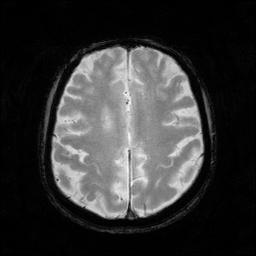

In [7]:
alex_1.dataset[0][0]

In [8]:
alex_1.view_train_label_distribution()

,label,count
0,0,1127
1,1,1137
2,2,1143
3,3,1155
4,4,1139
5,5,1139


In [9]:
alex_1.view_test_label_distribution()

,label,count
0,0,298
1,1,288
2,2,282
3,3,270
4,4,286
5,5,286


In [10]:
# alex_1.balance_feature()

In [11]:
# alex_1.view_train_label_distribution()

In [12]:
# alex_1.view_test_label_distribution()

In [13]:
alex_1.train_features.shape

(6840, 2048)

In [ ]:
min_component = 100

In [33]:
# pca = PCA(n_components=min(min_component, *alex_1.train_features.shape))
# train_features = pca.fit_transform(alex_1.train_features)
# test_features = pca.transform(alex_1.test_features)

# train_features.shape, alex_1.train_labels.__len__()

In [34]:
list_kernel = [
    # Kernel("rbf"),
    Kernel("laplacian"),
    # Kernel("sigmoid"),
    # Kernel("exponential"),
    # Kernel("cosine"),
    # Kernel("morlet_wavelet"),
    # Kernel("mexican_hat_wavelet"),
    # Kernel("haar_wavelet"),
    # Kernel("rational_quadratic"),
]

list_activation = [
    "mish",
    # "identity",
    # "sigmoid",
    # "tanh",
    # "relu",
    # "leaky_relu",
    # "prelu",
    # "elu",
    # "softplus",
    # "bent_identity",
    # "gaussian",
    # "sinusoidal",
    # "isru",
    # "isrlu",
    # "selu",
    # "softmax",
    # "ssigmoid",
    # "silu",
    # "gelu",
    # "log",
    # "cube",
    # "inverse",
    # "swish",
    # "bis",
    # "gompertz",
    # "elliott",
    # "isq",
    # "hardshrink",
    # "softshrink",
    # "sqrelu",
    # "sine",
    # "softexp",
    # "arctan",
    # "sin_transfer",
    # "hsigmoid",
    # "tsigmoid",
    # "arcsinh",
    # "logit",
    # "tlu",
    # "aq",
    # "logsigmoid",
    # "cosine",
    # "relu_cos",
    # "imq",
    # "cos_sigmoid",
    # "triangular",
    # "hardtanh",
    # "inverse_sine",
    # "bezier",
    # "bsigmoid",
    # "power",
    # "gswish",
    # "invgamma",
    # "softclip",
    # "inverse_cosine",
    # "sinusoid",
    # "inv_logit",
    # "soft_exponential",
    # "srelu",
    # "inverse_tangent",
    # "hswish",
    # "aqrelu",
    # "gelu2",
    # "sinusoid2",
    # "inverse_tanh",
    # "leaky_softplus",
    # "gaussian_tangent",
    # "exp_cosine",
    # "gaussian_cdf",
    # "hmish",
    # "smooth_sigmoid",
    # "log_exp",
    # "cubic",
    # "exp_sine",
    # "sym_sigmoid",
    # "square",
    # "soft_clipping",
    # "swish_gaussian",
    # "hard_shrink",
    # "smooth_hard_tanh",
    # "bipolar_sigmoid",
    # "log_sigmoid",
    # "hard_sigmoid",
    # "invsqrt",
    # "gauss_tanh",
    # "egaulu",
    # "logarithm",
    # "inv_sine",
    # "hard_tanh",
    # "bent_identity_smoothed",
    # "pos_softplus",
    # "inv_multiquadratic",
    # "inv_cosine",
    # "asymmetric_gaussian",
    # "inv_quadratic",
    # "gaussian_squared",
    # "symmetric_sigmoid",
    # "inv_cubic",
    # "cauchy",
    # "exponential_quadratic",
    # "rational_quadratic",
    # "cubic_spline",
    # "symmetric_soft_clipping",
    # "binary_step",
    # "imrbf",
    # "cloglog",
    # "nrelu",
]

list_layer = [
    {
        "kernel_name": kernel.kernel_name,
        "kernel_param": kernel.kernel_param,
        "activation_name": activation,
        "layer": KELMLayer(kernel, activation)
    } for kernel in list_kernel for activation in list_activation
]

list_model = [
    {
        **layer,
        "model": KELMModel(layer.get("layer")),
    } for layer in list_layer
]

len(list_model)

1

In [ ]:
# Cross Validation Param:
n_splits = 5
n_repeats = 5

In [36]:
alcl = AlzheptionClassificator(alex_1, list_model, n_splits=n_splits, n_repeats=n_repeats)

In [37]:
data = alcl.evaluate_with_cross_validation(n_components=min_component)

Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]2025-03-14 07:40:10.233251: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (mklcpu) ran out of memory trying to allocate 3.40GiB (rounded to 3655125248)requested by op Abs
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-03-14 07:40:10.235191: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1053] BFCAllocator dump for mklcpu
2025-03-14 07:40:10.235259: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-03-14 07:40:10.235275: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.


ResourceExhaustedError: {{function_node __wrapped__Abs_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[4275,4275,50] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:Abs] name: 

In [ ]:
alcl.df_evaluation.to_parquet(f"result/TrainKELM_{name}.parquet", index=False)

In [ ]:
alcl.df_evaluation.sort_values(by=["score_mean"]).tail()

,kernel_name,kernel_param,activation_name,score_list,score_mean
0,rbf,1.0,mish,"[0.8087719298245614, 0.8175438596491228, 0.768...",0.797614
1,laplacian,1.0,mish,"[0.8298245614035088, 0.8192982456140351, 0.785...",0.804491


In [ ]:
raise

RuntimeError: No active exception to reraise

In [ ]:
import pandas as pd

pd.read_parquet("result/TrainKELM_Threshold.parquet").sort_values(by=["score_mean"]).tail()

,kernel_name,kernel_param,activation_name,score_list,score_mean
10,laplacian,1.0,silu,"[0.6190476190476191, 0.5142857142857142, 0.692...",0.630626
7,laplacian,1.0,tanh,"[0.6190476190476191, 0.5142857142857142, 0.692...",0.630626
6,laplacian,1.0,sigmoid,"[0.6190476190476191, 0.5142857142857142, 0.692...",0.630626
9,laplacian,1.0,leaky_relu,"[0.6190476190476191, 0.5142857142857142, 0.692...",0.630626
8,laplacian,1.0,relu,"[0.6190476190476191, 0.5142857142857142, 0.692...",0.630626


In [ ]:
idx = alcl.df_evaluation.sort_values(by=["score_mean"]).tail(1).index.item()

idx

8

In [ ]:
alcl.hyperparameter[idx]

{'kernel_name': 'laplacian',
 'kernel_param': 1.0,
 'activation_name': 'relu',
 'layer': <TfELM.Layers.KELMLayer.KELMLayer at 0x7c9afb2ba6f0>,
 'model': KELMModel(kelm=<TfELM.Layers.KELMLayer.KELMLayer object at 0x7c9afb2ba6f0>)}

In [ ]:
model = alcl.hyperparameter[idx].get("model")

In [ ]:
# Train KELM on the extracted training features
model.fit(train_features, alex_1.train_labels)

In [ ]:
# Evaluate the KELM model on the test set
predictions = model.predict(train_features).numpy()
accuracy = accuracy_score(predictions, alex_1.train_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [ ]:
# Evaluate the KELM model on the test set
predictions = model.predict(test_features).numpy()
accuracy = accuracy_score(predictions, alex_1.test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5556


In [ ]:
import pandas as pd
import plotly

In [ ]:
df = pd.read_parquet("result/TrainKELM_Original.parquet")
df.tail()

,kernel_name,kernel_param,activation_name,score_list,score_mean
958,rational_quadratic,1.0,symmetric_soft_clipping,"[0.5102040816326531, 0.4639175257731959, 0.402...",0.473255
959,rational_quadratic,1.0,binary_step,"[0.5102040816326531, 0.4639175257731959, 0.402...",0.473255
960,rational_quadratic,1.0,imrbf,"[0.5102040816326531, 0.4639175257731959, 0.402...",0.473255
961,rational_quadratic,1.0,cloglog,"[0.5102040816326531, 0.4639175257731959, 0.402...",0.473255
962,rational_quadratic,1.0,nrelu,"[0.5102040816326531, 0.4639175257731959, 0.402...",0.473255


<Axes: >

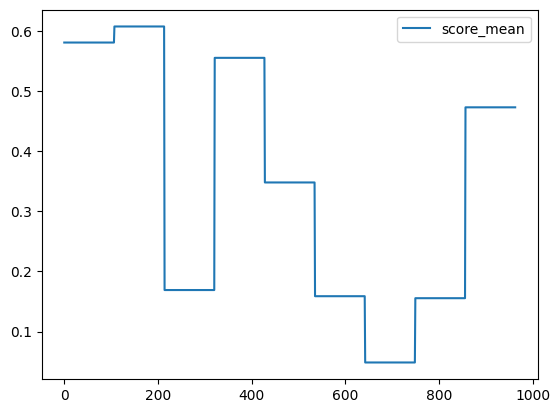

In [ ]:
df[["activation_name", "score_mean"]].plot()